In [1]:
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RVec.hxx"
#include <ROOT/RLogger.hxx>
#include "TCanvas.h"
#include "TFile.h"
#include "TH1D.h"
#include "TF1.h"
#include "TMath.h"
#include "THStack.h"
#include "TLegend.h"
#include "Math/Vector4D.h"

//cpp
#include <vector>
#include <iostream>
#include <fstream>
#include <iomanip>
#include <cstdlib>
#include <cstdio>
#include <string>
#include <Math/GenVector/LorentzVector.h>
#include <Math/GenVector/PtEtaPhiM4D.h>
#include <stdlib.h>
#include <math.h>
#include <TH1.h>

template <typename T> using Vec = ROOT::RVec<T>; 

In [2]:
ROOT::RDataFrame df("Events","/home/pietro/Documents/W3Pi/l1Nano_WTo3Pion_PU200_iso.root");
df.Describe()

(ROOT::RDF::RDFDescription) Dataframe from TChain Events in file /home/pietro/Documents/W3Pi/l1Nano_WTo3Pion_PU200_iso.root

Property                Value
--------                -----
Columns in total           41
Columns from defines        0
Event loops run             0
Processing slots            1

Column                  Type                            Origin
------                  ----                            ------
GenPi_charge            ROOT::VecOps::RVec<Int_t>       Dataset
GenPi_eta               ROOT::VecOps::RVec<Float_t>     Dataset
GenPi_mass              ROOT::VecOps::RVec<Float_t>     Dataset
GenPi_pdgId             ROOT::VecOps::RVec<Int_t>       Dataset
GenPi_phi               ROOT::VecOps::RVec<Float_t>     Dataset
GenPi_prompt            ROOT::VecOps::RVec<Int_t>       Dataset
GenPi_pt                ROOT::VecOps::RVec<Float_t>     Dataset
GenPi_vz                ROOT::VecOps::RVec<Float_t>     Dataset
GenW_charge             ROOT::VecOps::RVec<Int_t>       

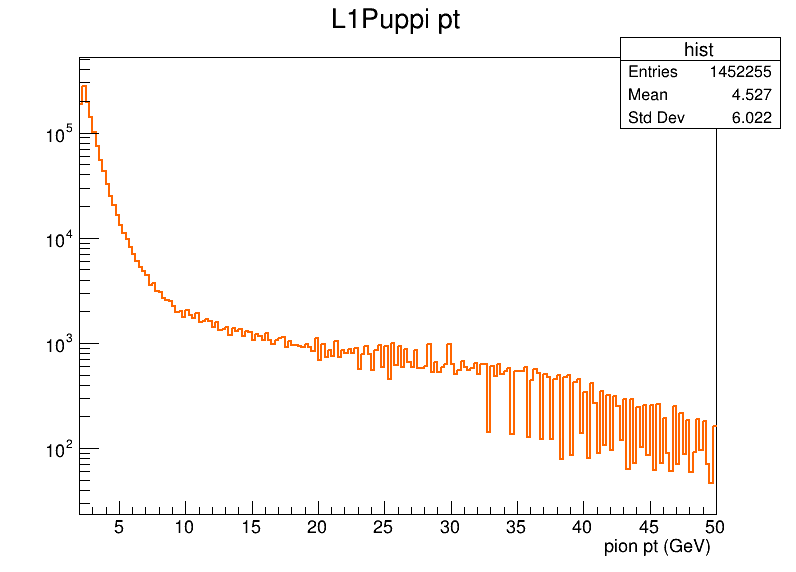

In [3]:
auto gen_pt   = df.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_pt").GetValue();
std::vector<float> pts;

for (const auto& pti : gen_pt) {
    pts.insert(pts.end(), pti.begin(), pti.end());
}

TH1F* hist_pt = new TH1F("hist", "L1Puppi pt; pion pt (GeV)", 192, 2, 50); //GeV
for (const auto &p : pts){
    if(p>0){
        hist_pt->Fill(p);
    }
}
hist_pt -> SetLineColor(kOrange+7);
hist_pt -> SetLineWidth(2);
// hist_pt -> Scale(N_lut/hist_pt-> Integral());
auto c1 = new TCanvas("c1", "c1", 800,600);
hist_pt->Draw();
c1->SetLogy();
c1->Draw();


## Building the pdf and the cdf

In [4]:
std::vector<double> pdf;
std::vector<double> cdf;
std::vector<float>  pt_bin;

for(int i=1; i < hist_pt -> GetNbinsX(); i++){
    pdf.push_back(hist_pt ->GetBinContent(i-1));
    pt_bin.push_back(hist_pt ->GetBinLowEdge(i));
}

cdf.push_back(pdf[0]);
for(int i=1; i < hist_pt -> GetNbinsX() -1; i++){
    cdf.push_back( (cdf[i-1]+pdf[i]) );
}
for(int i=0; i < hist_pt -> GetNbinsX(); i++){
    cdf[i] = cdf[i]/(*max_element(cdf.begin(), cdf.end()));
}

In [5]:
cdf.size()

(unsigned long) 191


## function to calculate the inverse cdf

In [6]:
float pt_generator(std::vector<double> cdf, std::vector<float> pt_bins, double p){
    int idx=0;
    for(int i=0; i < hist_pt -> GetNbinsX(); i++){
        if(p>=cdf[i] && p<=cdf[i+1]) idx=i;
    }
    return pt_bins[idx];
}

In [ ]:
1.0 / 2047.0;


In [ ]:
std::vector<float> probs;
std::vector<float> pt_LUT;
std::vector<int> pt_LUT_int;

float step = 1.0 / 2047.0;

for(float val=0; val<=1; val+=step ) probs.push_back(val);

std::cout << probs.size() << std::endl;
for(int i=0; i<probs.size(); i++){
    pt_LUT.push_back(pt_generator(cdf, pt_bin, probs[i]));
    pt_LUT_int.push_back(static_cast<int>(pt_LUT[i]/0.25));
}


4096


In [ ]:
pt_LUT

(std::vector<float> &) { 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.00000f, 2.000

### plot results using the generator
generate a random index for the LUT and save it

In [ ]:
std::random_device rd;
std::mt19937 gen(rd());
std::uniform_int_distribution<int> uniform_dist(0, 4096);
// int i = uniform_dist(gen);

int N = 1.5e6;
std::vector<float> pt_gen;

for(int i=0; i<N; i++){
    int idx = uniform_dist(gen);
    pt_gen.push_back(pt_LUT[idx]);

}

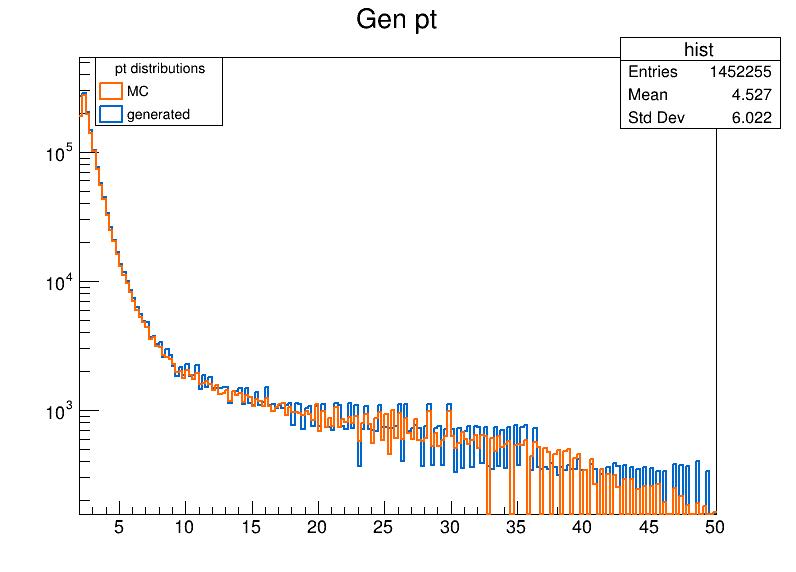

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [ ]:
auto c1 = new TCanvas("c1", "c1", 800,600);

TH1F* hist_gen = new TH1F("hist", "Gen pt; ", 192, 2, 50 ); //GeV
for (const auto &p : pt_gen){
    hist_gen->Fill(p);
}

hist_gen -> SetLineColor(kAzure+2);
hist_gen -> SetLineWidth(2);

auto legend = new TLegend(0.12,0.78,0.28,0.9); // (x1, y1, x2, y2)
legend->SetHeader("pt distributions", "C"); // option "C" allows to center the header
legend->AddEntry(hist_pt,  "MC", "f");
legend->AddEntry(hist_gen, "generated", "f");

hist_gen->Draw();
hist_pt->Draw("same");
c1->SetLogy();
legend->Draw();
c1->Draw();